In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from ISLP.bart import BART
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import (RandomForestClassifier as RFC, RandomForestRegressor as RFR, GradientBoostingRegressor as GBR)

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Carseats = load_data('Carseats')
High = np.where(Carseats['Sales'] > 8, 'Yes', 'No')

In [4]:
model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
D

,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0
396,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0
397,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0


In [5]:
feature_names = list(D.columns)
X = np.asarray(D)

In [6]:
clf = DTC(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X, High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [7]:
accuracy_score(High, clf.predict(X)), clf.score(X, High)

(0.79, 0.79)

In [8]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

0.47106470626493574

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.239\nsamples = 51\nvalue = [2, 49]'),
 Text(0.875, 0.375, 'In

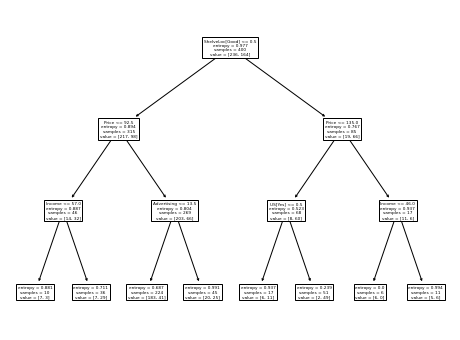

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_tree(clf, feature_names=feature_names, ax=ax)

In [10]:
print(export_text(clf, feature_names=feature_names, show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [13]:
results = cross_validate(clf, D, High, cv=10)
results['test_score'].mean()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

0.6825

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, High, test_size=0.5, random_state=0)
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.735

In [16]:
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path

{'ccp_alphas': array([0.        , 0.01622556, 0.0171946 , 0.0180482 , 0.0180482 ,
        0.01991688, 0.02012073, 0.02070855, 0.02193427, 0.0219518 ,
        0.02220877, 0.02274806, 0.02417233, 0.02588672, 0.02714959,
        0.02735525, 0.02900052, 0.02906078, 0.03209543, 0.04499252,
        0.06236632, 0.10024835]),
 'impurities': array([0.        , 0.01622556, 0.05061477, 0.06866297, 0.08671117,
        0.12654492, 0.14666566, 0.16737421, 0.18930848, 0.21126028,
        0.25567782, 0.27842588, 0.32677055, 0.35265727, 0.43410604,
        0.54352706, 0.57252758, 0.65970991, 0.72390076, 0.8138858 ,
        0.87625212, 0.97650047])}

In [17]:
grid = GridSearchCV(clf, {'ccp_alpha':ccp_path['ccp_alphas']}, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_score_

0.6799999999999999

In [19]:
grid.score(X_test, y_test), grid.best_estimator_

(0.685,
 DecisionTreeClassifier(ccp_alpha=0.025886720366496196, criterion='entropy',
                        random_state=0))

In [21]:
confusion = confusion_table(grid.best_estimator_.predict(X_test), y_test)
confusion

Truth,No,Yes
Predicted,,
No,93,38
Yes,25,44


In [22]:
Boston = load_data('Boston')
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Boston['medv'], test_size=0.3, random_state=0)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(0.6875, 0.125, 'squared_error = 6.997\nsamples = 4\nvalue = 

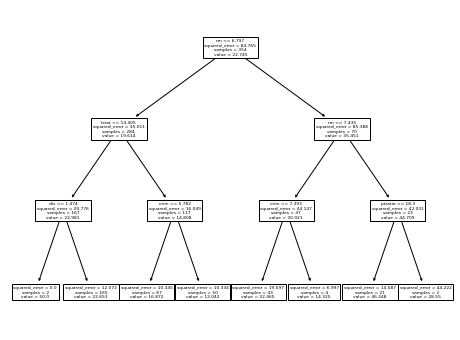

In [24]:
reg = DTR(max_depth=3, random_state=0)
reg.fit(X_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_tree(reg, feature_names=feature_names, ax=ax)

In [28]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
grid = GridSearchCV(reg, param_grid={'ccp_alpha':ccp_path['ccp_alphas']}, refit=True, cv=5, scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)
best_ = grid.best_estimator_
grid.best_score_


c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

-25.668088964553654

In [29]:
grid.score(X_test, y_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


-26.938732818409406

In [30]:
RF_boston = RFR(n_estimators=100, max_features=0.5, random_state=0, n_jobs=-1)
RF_boston.fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF) ** 2)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


20.04276446710527

In [32]:
feature_imp = pd.DataFrame({'importances':RF_boston.feature_importances_}, index=feature_names)
feature_imp.sort_values(by='importances', ascending=False)

,importances
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784
